#### On toymodules.
Compared to the sgan code, the toymodules dont have any type of pooling, i.e. the network does not know that agents are together in a scene. A very big __difference__ of __sgan__ and __toymodules__ to our __initial way to implement the modules__ is that the generator only __generates displacements__ and __loss is computed on displacements__.

#### Other remarks.
I renamed some variables for clarifying things:

- obs_taj -> xy_in
- obs_traj_rel -> dxdy_in
- pred_taj -> xy_out
- pred_traj_rel -> dxdy_out
- obs_len -> in_len
- pred_len -> out_len

Moreover, I commented some parts in sgan code and our code starting with "Important" and "Questions". In Pycharm you can go to Settings -> TODO and then create new keywords as TODO that will be highlighted in different colors. Thats super nice.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import Solver, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir)

In [5]:
generator = ToyGenerator(in_len=8, out_len=12)
discriminator = ToyDiscriminator()
models = {'discriminator': discriminator, 'generator': generator} # lmk if too cumbersome to pass both in a dict

In [6]:
solver = Solver(models=models,  # pls read the code and docstrings to get the idea
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-2}, 'discriminator': {'lr': 1e-2}})

In [8]:
solver.train(trainloader, epochs = 10, checkpoint_every=1, steps = {'generator': 1, 'discriminator': 1})

G_gan: 0.676	G_norm: 0.263	G_total: 0.939	D_real: 0.667	D_fake: 0.757	D_total: 1.424	
G_gan: 0.634	G_norm: 0.348	G_total: 0.983	D_real: 0.632	D_fake: 0.753	D_total: 1.385	
G_gan: 0.680	G_norm: 0.385	G_total: 1.065	D_real: 0.663	D_fake: 0.750	D_total: 1.413	
G_gan: 0.648	G_norm: 0.275	G_total: 0.923	D_real: 0.673	D_fake: 0.746	D_total: 1.419	
G_gan: 0.665	G_norm: 0.250	G_total: 0.915	D_real: 0.638	D_fake: 0.741	D_total: 1.379	
G_gan: 0.653	G_norm: 0.263	G_total: 0.916	D_real: 0.635	D_fake: 0.731	D_total: 1.366	
G_gan: 0.663	G_norm: 0.255	G_total: 0.918	D_real: 0.640	D_fake: 0.725	D_total: 1.364	
G_gan: 0.676	G_norm: 0.238	G_total: 0.914	D_real: 0.670	D_fake: 0.721	D_total: 1.391	
G_gan: 0.680	G_norm: 0.243	G_total: 0.923	D_real: 0.661	D_fake: 0.717	D_total: 1.378	
G_gan: 0.675	G_norm: 0.244	G_total: 0.919	D_real: 0.669	D_fake: 0.714	D_total: 1.383	


#### Visualize things.
As we talked about, I implemented a simple plotting class that is supposed to integrate with the rest. E.g. vis.loss takes the dictionary 'solver.train_loss_history' of the solver object to plot all losses.
- For everything that you would like to visualize, think about how we could implement it in the class Visualization.

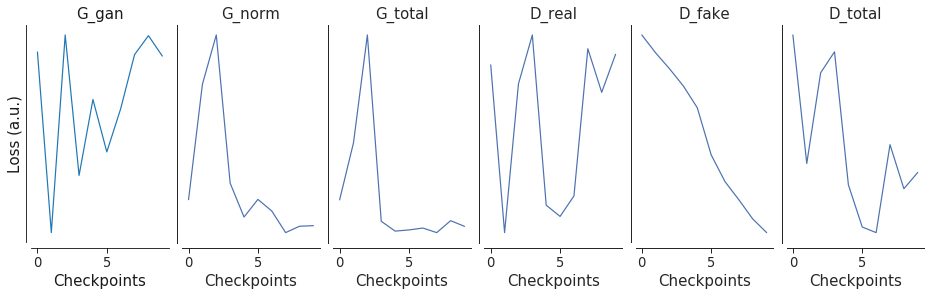

In [9]:
vis = Visualization()
vis.loss(solver.train_loss_history)